# Useful concepts for spatio-temporal data analysis

In this session, you will

- understand the relationship between linear transformations and matrix transformations
- apply linear transformations to a data set
- visualize linear transformations
- generate (multivariate) normal random data
- compute the covariance of a multi-dimensional data set
- compute the eigenvalues and eigenvectors of a (covariance) matrix
- apply singular value decomposition (SVD)

In [1]:
%matplotlib inline
from IPython.display import HTML
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.patches as patches
import cartopy.io.shapereader as shpreader
import warnings
warnings.filterwarnings('ignore')

# some settings for plotting and printing
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['font.size'] = 18
np.set_printoptions(precision=4, suppress=True)

# Two motivating examples

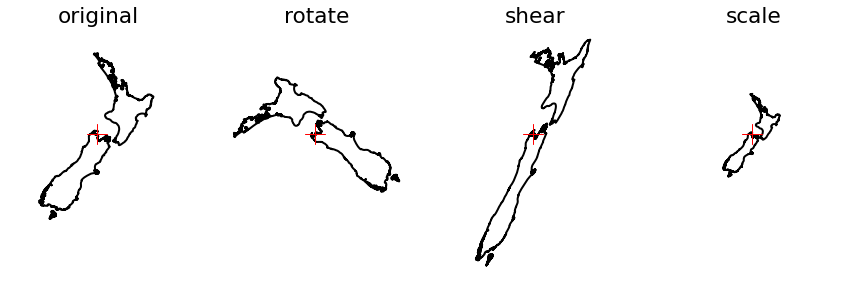

In [2]:
# EXAMPLE 1
reader = shpreader.Reader("data/lds-nz-coastlines-topo-1500k-SHP/nz-coastlines-topo-1500k.shp")

fig, axes = plt.subplots(1,4,figsize=(15,6),sharex=True,sharey=True)
[ax.set_axis_off() for ax in axes]
[ax.set_aspect("equal") for ax in axes]
[ax.set_title(t) for ax,t in zip(axes,["original","rotate","shear","scale"])]

A0 = np.array([[1,0],[0,1]])     # identity
A1 = np.array([[0,-1],[1,0]])    # rotate by 90°
A2 = np.array([[1,0],[1,1]])     # shear
A3 = np.array([[0.5,0],[0,0.5]]) # scale by half

for c in reader.records():
    x, y = np.array(c.geometry.xy)
    x -= 1590978.2713233929; y -= 5485571.138889672 # center data on (0,0)
    for i,A in enumerate([A0,A1,A2,A3]):
        X = A@np.array([x,y]) # apply transformation
        axes[i].plot(X[0,:],X[1,:],c='k',lw=2)
        axes[i].plot(0,0,'r+',markersize=20)

In [3]:
# EXAMPLE 2
img = Image.open("figures/frozen.jpg")
img_gs = img.convert('L')

X = np.array(img_gs)
print(X.shape)
print(X)

(400, 400)
[[15 15 15 ... 19 19 19]
 [15 15 15 ... 19 19 19]
 [15 15 15 ... 19 19 19]
 ...
 [58 58 56 ... 33 31 35]
 [58 58 56 ... 37 27 34]
 [58 57 55 ... 38 23 32]]


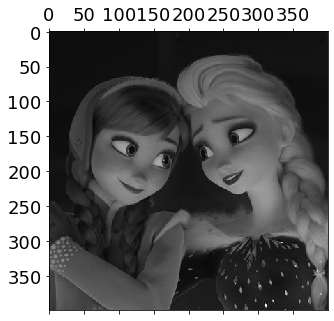

In [4]:
plt.matshow(X, cmap=plt.get_cmap('gray'), vmin=0, vmax=255);

(400, 400)
(400, 400)
(400,)


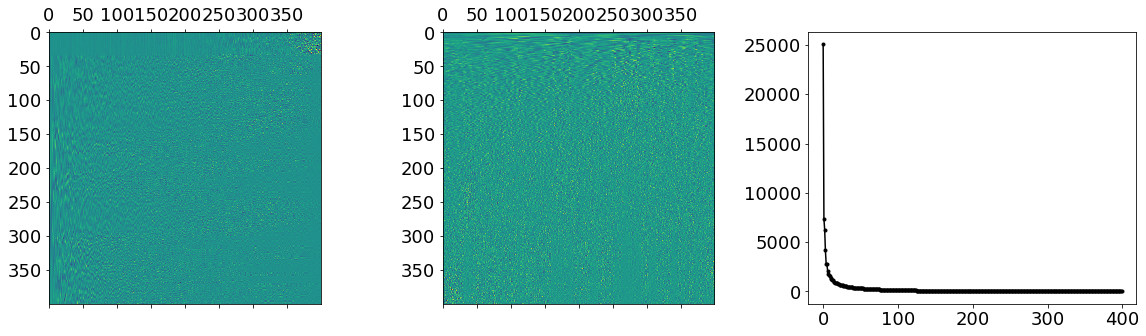

In [5]:
u, s, vh = np.linalg.svd(X,full_matrices=True)
print(vh.shape)
print(u.shape)
print(s.shape)
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].matshow(u)
ax[1].matshow(vh)
ax[2].plot(s,'k.-');

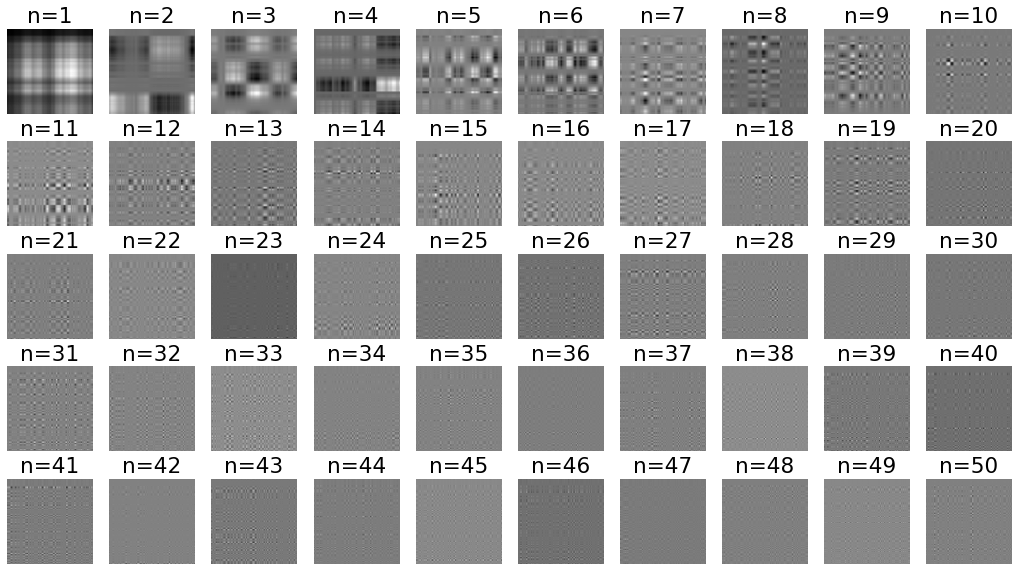

In [6]:
fig, axes = plt.subplots(5,10,sharex=True,sharey=True,figsize=(18,10))
axes = axes.flatten()

for n in range(50):
    singular_vector = np.matrix(u[:, n:n+1]) * np.diag(s[n:n+1]) * np.matrix(vh[n:n+1, :])
    axes[n].imshow(singular_vector, cmap='gray')
    axes[n].set_axis_off()
    axes[n].set_title(f"n={n+1}")

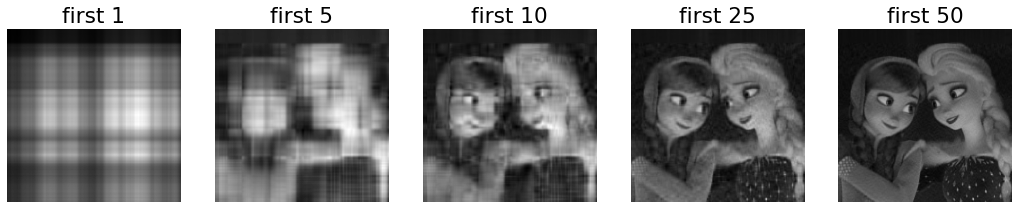

In [7]:
fig, ax = plt.subplots(1,5,sharex=True,sharey=True,figsize=(18,5))
ax = ax.flatten()
n_pc = [1,5,10,25,50]
for i,n in enumerate(n_pc):
    n = n_pc[i]
    img_reconstr = np.matrix(u[:, :n]) * np.diag(s[:n]) * np.matrix(vh[:n, :])
    ax[i].imshow(img_reconstr, cmap='gray')
    ax[i].set_axis_off()
    ax[i].set_title(f"first {n}")

# Let's get started

In [8]:
# helper function for plotting:
# create a xy plot time series data
def plot_xy(X,ax,xlab=None,ylab=None,title=None,off=False,grid=False,color='k'):
    ax.plot(X[:,0],X[:,1],ls='',marker='o',mew=0,color=color)
    ax.set_aspect("equal")
    ax.set_xlabel(xlab); ax.set_ylabel(ylab)
    ax.set_title(title)
    if off: ax.set_axis_off()
    if grid: ax.grid()

In [9]:
# helper functions for animations:
def init():
    ax.add_patch(patch)
    return patch,

def animate(i,M):
    global x
    patch = plt.Arrow(0,0, x[0],x[1],color='r',lw=2,alpha=0.2)
    x = M@x # <- this is the matrix transformation
    ax.add_patch(patch)
    return patch,

## Linear transformations

A linear tranformation maps lines to lines. 

Every linear transformation can be associated with a matrix (and vice versa). Examples are
- rotation
- scaling

### What is a rotation?

In [10]:
theta = np.radians(40) # angle of rotation
print(f"θ = {np.degrees(theta)}°")
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
print(f"R=\n{R}")

θ = 40.0°
R=
[[ 0.766  -0.6428]
 [ 0.6428  0.766 ]]


#### Q: How many rotations do we need to get back to where we started?

In [11]:
# A: 9 --> 9 x 40° = 360°
result = np.linalg.matrix_power(R, 9)
print(result)
# compare result to identity matrix:
np.allclose(np.identity(2),result)

[[ 1.  0.]
 [-0.  1.]]


True

In [12]:
x = np.array([1,0]) # <- our initial arrow, pointing to the right
theta = np.radians(108) # angle of rotation
print(f"θ = {np.degrees(theta)}°")
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

# some animation code (skip for now)
fig, ax = plt.subplots(figsize=(5,5))

ax.set_aspect("equal")
ax.set_axis_off()
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
patch = patches.Arrow(0,0,0,0,color='k',lw=0)

t = range(11)

ani = matplotlib.animation.FuncAnimation(fig, animate, fargs=(R,), init_func=init, 
                                         frames=len(t), interval=300)
plt.close()

θ = 108.0°


In [13]:
HTML(ani.to_jshtml())

### What is scaling?

In [14]:
x = np.array([1,1]) # <- our initial arrow, pointing to the upper right
S = np.diag([1.25,1]) # scaling in x-direction
print(f"S=\n{S}")

fig, ax = plt.subplots(figsize=(8,4))

ax.set_aspect("equal")
ax.set_axis_off()
ax.set_xlim(-0.1,5.1)
ax.set_ylim(-0.1,1.1)
patch = patches.Arrow(0,0,0,0,color='k',lw=0)

t = range(8)

ani = matplotlib.animation.FuncAnimation(fig, animate, fargs=(S,), init_func=init, 
                                         frames=len(t), interval=300)

plt.close()

S=
[[1.25 0.  ]
 [0.   1.  ]]


In [15]:
HTML(ani.to_jshtml())

#### Q: What is the "unscale" transformation for $S$?

In [16]:
# A: It's the inverse of S
U = np.linalg.inv(S)
print(np.linalg.inv(S))

[[0.8 0. ]
 [0.  1. ]]


### Rotate + Scale

In [17]:
x = np.array([1,0]) # <- our initial arrow, pointing to the right

fig, ax = plt.subplots(figsize=(4,4))

ax.set_aspect("equal")
ax.set_axis_off()
ax.set_xlim(-2.1,2.1)
ax.set_ylim(-2.1,2.1)
patch = patches.Arrow(0,0,0,0,color='k',lw=0)

t = range(10)

ani = matplotlib.animation.FuncAnimation(fig, animate, fargs=(R@S,), init_func=init, 
                                         frames=len(t), interval=400)

plt.close()

In [18]:
HTML(ani.to_jshtml())

### Other transformations

- shear, e.g., $A = \begin{bmatrix}1 & 0 \\ 1 & 1\end{bmatrix}$
- reflection, e.g., $A = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$
- projection, e.g., $A = \begin{bmatrix}1 & 0 \\ 0 & 0\end{bmatrix}$

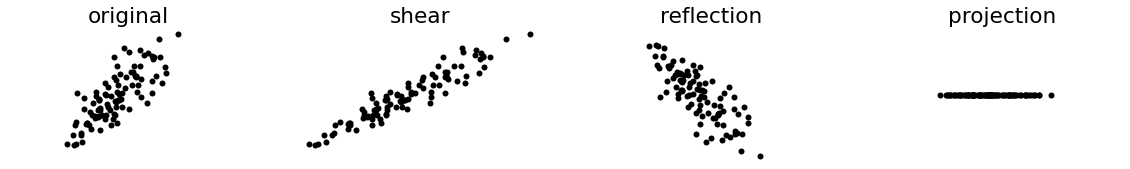

In [19]:
# Let's visualize them with data in a x-y scatter plot
rng = np.random.default_rng(1234) # random number generator instance

N = 100

C1 = np.array([[1,0.8],[0.8,1]]) # correlated data
X = rng.multivariate_normal(mean=[0,0],cov=C1,size=N)

fig, ax = plt.subplots(1,4,figsize=(20,5),sharex=True,sharey=True)
plot_xy(X,ax[0],title="original",off=True)
plot_xy(X@np.array([[1,0],[1,1]]),ax[1],title="shear",off=True)
plot_xy(X@np.array([[1,0],[0,-1]]),ax[2],title="reflection",off=True)
plot_xy(X@np.array([[1,0],[0,0]]),ax[3],title="projection",off=True)

## Covariance

The covariance between two variables is defined as $Cov(x,y) = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n-1}$

In [20]:
# Let's generate two random numbers
rng = np.random.default_rng(1234)
n = 2
x = rng.normal(size=n)
print(x)

μ_x = np.mean(x)
print(μ_x)
cov_x = np.sum((x-μ_x)*(x-μ_x))/(n-1) # write out the definition of Cov(x,y)
print(cov_x)

[-1.6038  0.0641]
-0.7698684456962687
1.3910064499615267


In [21]:
# compare with numpy.cov()
print(np.cov(x))

1.3910064499615267


In [22]:
# This can be generalized multiple vectors, e.g., 2
rng = np.random.default_rng(1234)
n = 2
x = rng.normal(size=n)
y = rng.normal(size=n)
print(f"x={x}")
print(f"y={y}")

μ_x = np.mean(x)
μ_y = np.mean(y)
cov_xx = np.sum((x-μ_x)*(x-μ_x))/(n-1)
cov_xy = cov_yx = np.sum((x-μ_x)*(y-μ_y))/(n-1)
cov_yy = np.sum((y-μ_y)*(y-μ_y))/(n-1)

C = np.array([[cov_xx,cov_xy],[cov_yx,cov_xx]])
print(f"Cov(x,y)=\n{C}")

x=[-1.6038  0.0641]
y=[0.7409 0.1526]
Cov(x,y)=
[[ 1.391  -0.4906]
 [-0.4906  1.391 ]]


In [23]:
# again, let's compare it with numpy.cov()
print(np.cov([x,y]))

[[ 1.391  -0.4906]
 [-0.4906  0.173 ]]


### Covariance is a measure for the relationship between data sets.

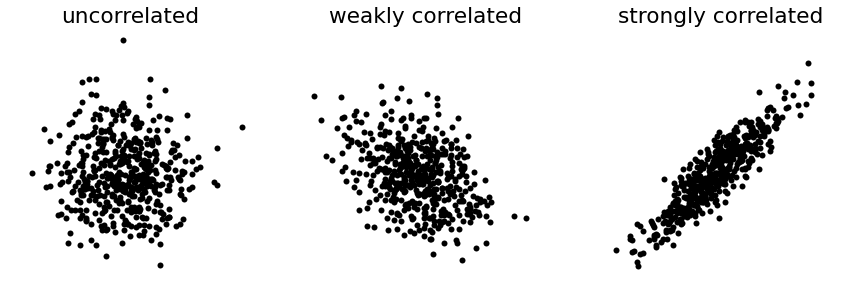

In [24]:
rng = np.random.default_rng(1234) # random number generator instance

n = 500

fig, ax = plt.subplots(1,3,figsize=(15,6),sharex=True,sharey=True)
C1 = np.array([[1,0],[0,1]])
X1 = rng.multivariate_normal(mean=[0,0],cov=C1,size=n)
plot_xy(X1,ax[0],title="uncorrelated",off=True)
C2 = np.array([[1,-0.4],[-0.4,1]])
X2 = rng.multivariate_normal(mean=[0,0],cov=C2,size=n)
plot_xy(X2,ax[1],title="weakly correlated",off=True)
C3 = np.array([[1,0.9],[0.9,1]])
X3 = rng.multivariate_normal(mean=[0,0],cov=C3,size=n)
plot_xy(X3,ax[2],title="strongly correlated",off=True)

In [25]:
n = 1000 # use more data points this time 
n_components = 2

# define a covariance matrix (is symmetric!)
C = np.array([[1,0],[0,1]])
X = rng.multivariate_normal(mean=[0,0],cov=C,size=(n))

print(f"C=\n{C}")
print(f"np.cov(X)=\n{np.cov(X.T)}")
# (increase the number of data points see what happens to np.cov(Z.T))

C=
[[1 0]
 [0 1]]
np.cov(X)=
[[0.9811 0.0046]
 [0.0046 0.9267]]


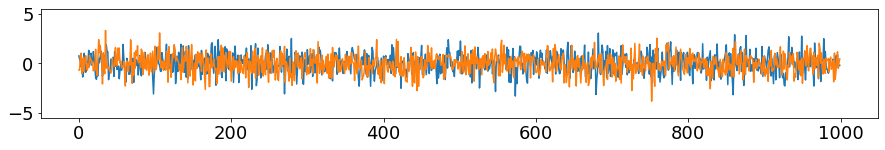

In [26]:
plt.figure(figsize=(15,2))
plt.plot(X)
plt.ylim(-5.5,5.5);

In [27]:
# scaling the data
# define scale matrix S
S = np.diag([2,1])
print(f"S=\n{S}")

# apply scale operator
Xs = X@S

S=
[[2 0]
 [0 1]]


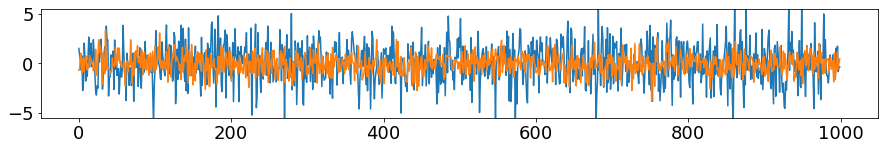

In [28]:
plt.figure(figsize=(15,2))
plt.plot(Xs)
plt.ylim(-5.5,5.5);

# Compared to the previous figure, what do you observe?

In [29]:
# now stretch & rotate

# inverse of rotation matrix R
R_inv = np.linalg.inv(R)
print(f"R_inv\n={R_inv}")

R_inv
=[[-0.309   0.9511]
 [-0.9511 -0.309 ]]


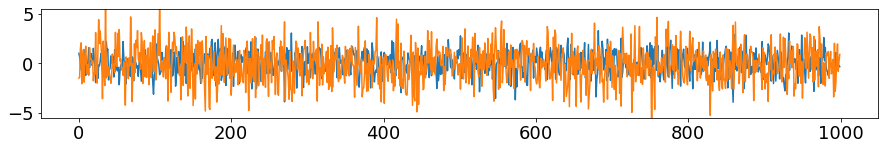

In [30]:
# appy series of operators (read from right to left)
M = R@S@R_inv
Xsr = X@M
plt.figure(figsize=(15,2))
plt.plot(Xsr)
plt.ylim(-5.5,5.5);

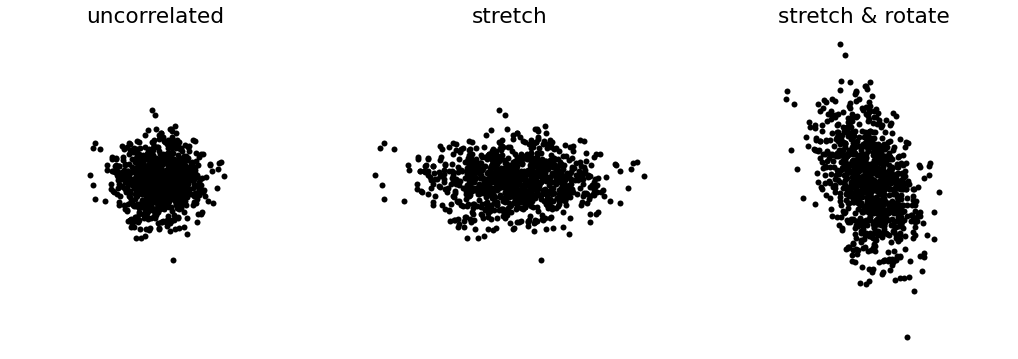

In [31]:
# Let's look at all three steps in a x-y scatter plot
fig, ax = plt.subplots(1,3,figsize=(18,6),sharex=True,sharey=True)
plot_xy(X,ax[0],title="uncorrelated",off=True)
plot_xy(Xs,ax[1],title="stretch",off=True)
plot_xy(Xsr,ax[2],title="stretch & rotate",off=True)

In [32]:
# What's the covariance of the stretched & rotated data set?
C2 = np.cov(Xsr.T)
print(f"C2\n={C2}")

# Compare with M*M, the chain of linear transformations
print(f"M*M\n={M@M}")

C2
=[[ 1.2545 -0.8246]
 [-0.8246  3.441 ]]
M*M
=[[ 1.2865 -0.8817]
 [-0.8817  3.7135]]


In [33]:
# Let's compute the eigenvalues and eigenvectors of the covariance matrix
w, v = np.linalg.eig(C2)
print(f"w=\n{np.diag(w)}")
print(f"v=\n{v}")

# or more excactky for the chain of linear transformations (M*M)
w, v = np.linalg.eig(M@M)
print(f"w=\n{np.diag(w)}")
print(f"v=\n{v}")

# Compare v with R, what do you see?

w=
[[0.9784 0.    ]
 [0.     3.7171]]
v=
[[-0.9483  0.3175]
 [-0.3175 -0.9483]]
w=
[[1. 0.]
 [0. 4.]]
v=
[[-0.9511  0.309 ]
 [-0.309  -0.9511]]


In [34]:
print(f"R=\n{R}")

R=
[[-0.309  -0.9511]
 [ 0.9511 -0.309 ]]


In [35]:
# Let's use Numpy's singular value decomposition (SVD)
u,s,vh = np.linalg.svd(Xsr)
print(f"u=\n{u[:,:n_components]}")
print(f"s=\n{np.diag(s)}")
print(f"vh=\n{vh.T}")
# What do you observe?

u=
[[-0.0285  0.016 ]
 [-0.0252  0.0058]
 [ 0.0242  0.0137]
 ...
 [-0.0108 -0.0176]
 [ 0.0047 -0.0039]
 [ 0.0159 -0.0008]]
s=
[[60.9892  0.    ]
 [ 0.     31.2633]]
vh=
[[-0.3176  0.9482]
 [ 0.9482  0.3176]]


In [36]:
#check if composition of u*s*vh == Xsr
np.allclose(u[:,:n_components]@np.diag(s)@vh,Xsr)

True

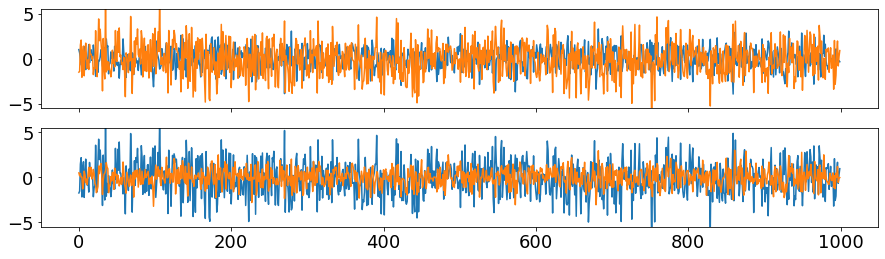

In [37]:
# Compute principal components
pc = u[:,:n_components]@np.diag(s)

fig, ax = plt.subplots(2,1,figsize=(15,4),sharex=True,sharey=True)
ax[0].plot(Xsr)
ax[1].plot(pc)
plt.ylim(-5.5,5.5);

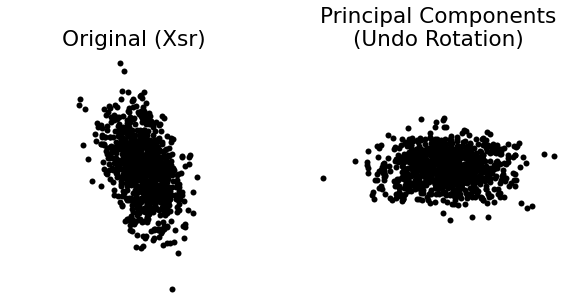

In [38]:
fig, ax = plt.subplots(1,2,figsize=(10,6),sharex=True,sharey=True)
# X-Y plots for the applied transformations
plot_xy(Xsr,ax[0],title="Original (Xsr)",off=True)
plot_xy(pc,ax[1],title="Principal Components\n(Undo Rotation)",off=True)

**Q: What happens to the principle components if the timeseries are uncorrelated?**

## What have we learned so far?

1. A **matrix** defines a **linear transformation** of a vectors (or, similarly, data points).

2. Any set of indexed data can be re-arranged into a **matrix**, $M$, with *rows* representing the time  series of each location (*columns*).
$$
M = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{t1}       & x_{t2} & x_{t3} & \dots & x_{tn}
\end{bmatrix}
$$

3. We are looking for a *new* coordinate system for our data, in which the **principal components** (or singular vectors) form a new basis (i.e., are orthogonal). Alternatively: Any matrix $M$ can be decomposed into $M = USV^T$

4. A **Singual Value Decomposition** (SVD) can be understood as a combination of two matrix operations (or transformations): **rotation** and **scaling**, applied to the new orthogonal basis.

5. The SVD represents an expansion of the original data in a coordinate system where the **covariance matrix** is diagonal.
$$C = M^TM = VS^2V^T$$